In [1]:
# Preliminary
## Columnar analysis basics.
import uproot
import awkward as ak
## Plotting.
import matplotlib.pyplot as plt

# Hists
import hist
from hist import Hist

# NanoEvents
from coffea.nanoevents import NanoEventsFactory, BaseSchema
# Processors
import coffea.processor as processor
from coffea.nanoevents import NanoEventsFactory, NanoAODSchema

import numpy as np

In [2]:
fname   = "/eos/home-b/bchitrod/HHH/NANOAOD/TRSM_XToHY_6b_M3_2000_M2_1100_NANOAOD.root"

In [3]:
eventsToRead = 10000
events = NanoEventsFactory.from_root(fname,schemaclass=NanoAODSchema,metadata={"dataset": "testSignal"},entry_stop=eventsToRead).events()
events

<NanoEventsArray [<event 1:1:9901>, ... <event 1:1:2500>] type='10000 * event'>

In [4]:
events.GenJetAK8.fields

['eta', 'mass', 'phi', 'pt', 'partonFlavour', 'hadronFlavour']

In [5]:
ptcut  = 250
etacut = 2.5

genjets = events.GenJetAK8[(events.GenJetAK8.pt>ptcut) & (np.abs(events.GenJetAK8.eta)<etacut)] 

trijets = genjets[(ak.num(genjets, axis=1) > 2)]

In [6]:
trijet_mass = (trijets[:,0]+trijets[:,1]+trijets[:,2]).mass
#calc inv mass of trijets by lorentz v. sum of three leading jets

dijet1_mass = (trijets[:,0]+trijets[:,1]).mass
#calc inv mass of first dijet combination

dijet2_mass = (trijets[:,0]+trijets[:,2]).mass
#calc inv mass of first dijet combination

dijet3_mass = (trijets[:,1]+trijets[:,2]).mass
#calc inv mass of first dijet combination

In [7]:
j3_bin = hist.axis.Regular(label="Trijet Mass [GeV]", name="trijet_mass", bins=40, start=0, stop=4000)
j3_cat = hist.axis.StrCategory(label='Trijets', name='trijet', categories=["signal"])#can add bkg categories later on

In [8]:
j3_hist = Hist(j3_bin, j3_cat)

In [9]:
j3_hist.fill(trijet="signal", trijet_mass=trijet_mass)

Hist(
  Regular(40, 0, 4000, name='trijet_mass', label='Trijet Mass [GeV]'),
  StrCategory(['signal'], name='trijet', label='Trijets'),
  storage=Double()) # Sum: 6369.0 (6406.0 with flow)

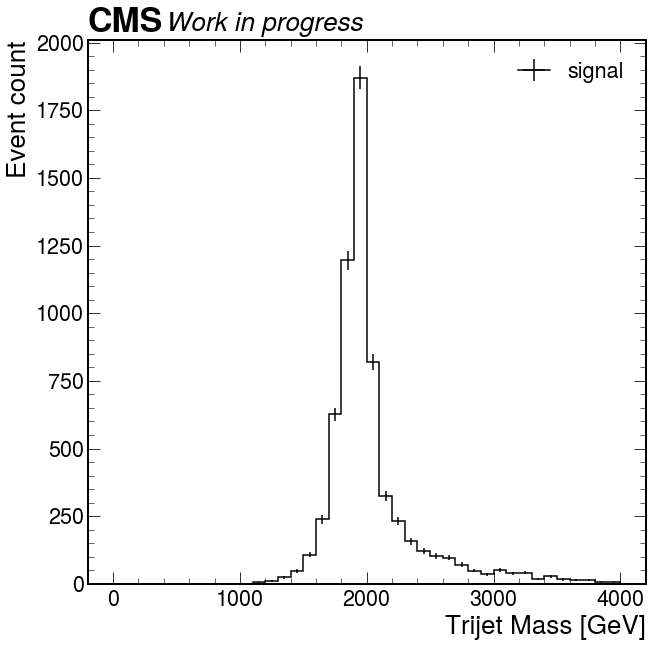

In [10]:
import mplhep as hep
plt.style.use([hep.style.CMS])
j3_hist.plot(color="black")
hep.cms.text("Work in progress",loc=0)
plt.ylabel("Event count",horizontalalignment='right', y=1.0)
plt.legend()

In [11]:
j2_bin = hist.axis.Regular(label="Dijet Mass [GeV]", name="dijet_mass", bins=40, start=0, stop=2000)
j2_cat = hist.axis.StrCategory(label='Dijets', name='dijet', categories=["Pair1","Pair2","Pair3"])

In [12]:
j2_hist = Hist(j2_bin, j2_cat)

In [13]:
j2_hist.fill(dijet="Pair1", dijet_mass=dijet1_mass)
j2_hist.fill(dijet="Pair2", dijet_mass=dijet2_mass)
j2_hist.fill(dijet="Pair3", dijet_mass=dijet3_mass)

Hist(
  Regular(40, 0, 2000, name='dijet_mass', label='Dijet Mass [GeV]'),
  StrCategory(['Pair1', 'Pair2', 'Pair3'], name='dijet', label='Dijets'),
  storage=Double()) # Sum: 18755.0 (19218.0 with flow)

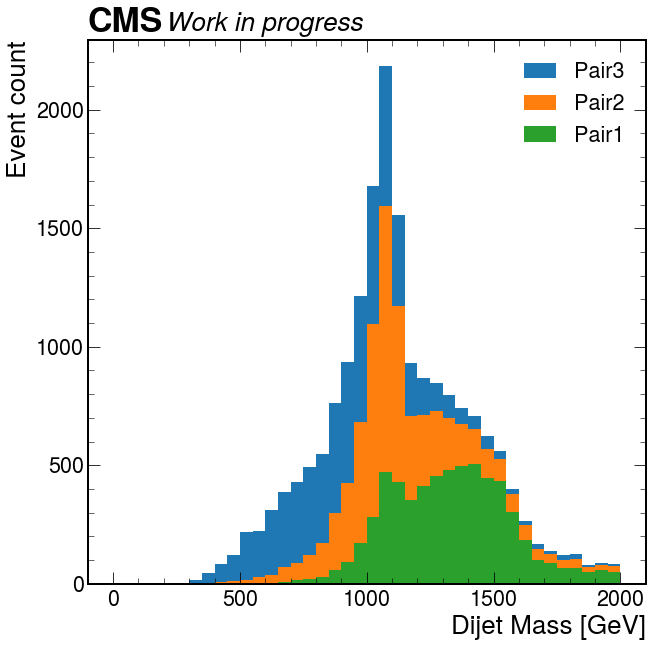

In [15]:
j2_hist.plot(stack=True,histtype='fill')
hep.cms.text("Work in progress",loc=0)
plt.ylabel("Event count",horizontalalignment='right', y=1.0)
plt.legend()